In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [164]:
data = pd.read_excel('SC82_D02.01(b) Finalised version of the LIFO monitoring mechanism.xlsx',sheet_name='Questionnaire',header=2,
          usecols=[2,3,6,9,11,13,15]).set_index(['Rec #','Id'])
data['Note_range']=[6,2,3,4,
                  '1-5',2,6,4,
                  4,4,12,4,
                  18,6,5,5,
                  7,7,10,4,
                  2,5,4,10,
                  'random_0-1','random_0-1',1,'Nan',
                  9,8,18,5,
                  6,7,'0-20',10,
                 1,2,2,4,
                  4,4,'random_0-1',5,11]

In [165]:
data = pd.concat([data,pd.DataFrame(columns=['Country_'+str(k) for k in range(1,6)])],axis=1)

data[['Country_'+str(k) for k in range(1,6)]]=\
np.array((np.random.randint(7, size=5),np.random.randint(3, size=5),np.random.randint(4, size=5),np.random.randint(5, size=5),
        np.random.randint(low=1,high=5,size=5),np.random.randint(3, size=5),np.random.randint(7, size=5),np.random.randint(5, size=5),
        np.random.randint(5, size=5),np.random.randint(5, size=5),np.random.randint(13, size=5),np.random.randint(5, size=5),
        np.random.randint(19, size=5),np.random.randint(7, size=5),np.random.randint(6, size=5),np.random.randint(6, size=5),
        np.random.randint(8, size=5),np.random.randint(8, size=5),np.random.randint(11, size=5),np.random.randint(5, size=5),
        np.random.randint(3, size=5),np.random.randint(6, size=5),np.random.randint(5, size=5),np.random.randint(11, size=5),
        np.random.rand(5),np.random.rand(5),np.random.randint(2, size=5),np.repeat(np.nan,5),
        np.random.randint(10, size=5),np.random.randint(9, size=5),np.random.randint(19, size=5),np.random.randint(6, size=5),
        np.random.randint(7, size=5),np.random.randint(8, size=5),np.random.randint(2,size=5)*20,np.random.randint(11,size=5),
        np.random.randint(2,size=5),np.random.randint(3,size=5),np.random.randint(3,size=5),np.random.randint(5,size=5),
        np.random.randint(5,size=5),np.random.randint(5,size=5),np.random.rand(5),np.random.randint(6,size=5),
        np.random.randint(12,size=5)))

In [166]:
data = pd.concat([data,pd.DataFrame(columns=['Country_radar_'+str(k) for k in range(1,6)])],axis=1)

data[['Country_radar_'+str(k) for k in range(1,6)]]= \
np.divide(data[['Country_'+str(k) for k in range(1,6)]].values.T-np.concatenate((np.zeros(4),[1],np.zeros(40)),axis=0),
          np.array((6,2,3,4,5,2,6,4,4,4,12,4,18,6,5,5,7,7,10,4,2,5,4,10,1,1,1,1,9,8,18,5,6,7,20,10,1,2,2,4,4,4,1,5,11))).T

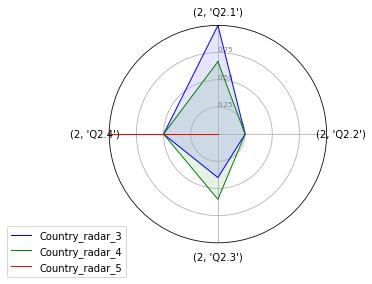

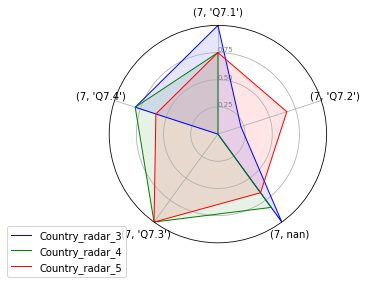

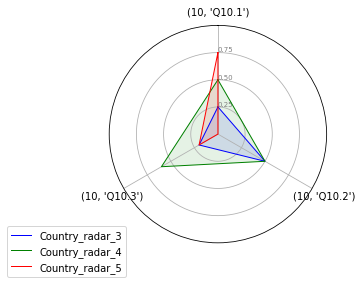

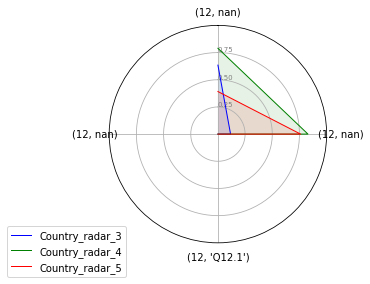

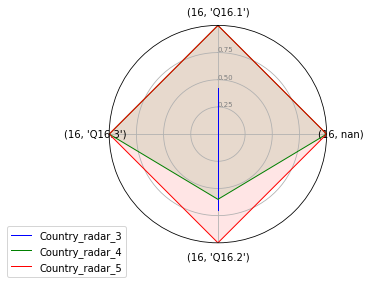

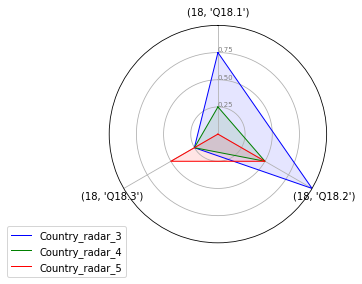

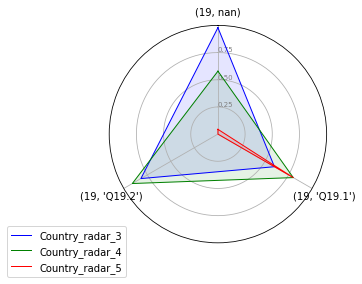

In [167]:
for ig, g in data.groupby('Rec #'):
    if len(g)>2:
        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n/float(len(g)) * 2 * np.pi for n in range(len(g))]
        angles += angles[:1]

        # Initialise the radar plot
        ax = plt.subplot(111, polar=True)

        # If you want the first axis to be on top:
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], g.index.values)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([.25,.50,.75], ["0.25","0.50","0.75"], color="grey", size=7)
        plt.ylim(0,1)

        colors = ['b','g','r','c','m','y','k','w']

        # ------- PART 2: Add plots

        # Plot each individual = each line of the data
        co = -1
        for ex in g.iloc[:,-3:]:
            co+=1
            values=g[ex].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, colors[co], linewidth=1, linestyle='solid', label=ex)
            ax.fill(angles, values, colors[co], alpha=0.1)
            ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.show()

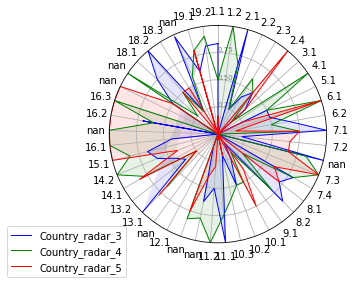

In [168]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n/float(len(data)) * 2 * np.pi for n in range(len(data))]
angles += angles[:1]

# Initialise the radar plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], data.index.get_level_values(1).str[1:])

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([.25,.50,.75], ["0.25","0.50","0.75"], color="grey", size=7)
plt.ylim(0,1)

colors = ['b','g','r','c','m','y','k','w']

# ------- PART 2: Add plots

# Plot each individual = each line of the data
co = -1
for ex in data.iloc[:,-3:]:
    co+=1
    values=data[ex].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, colors[co], linewidth=1, linestyle='solid', label=ex)
    ax.fill(angles, values, colors[co], alpha=0.1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()